In [31]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils

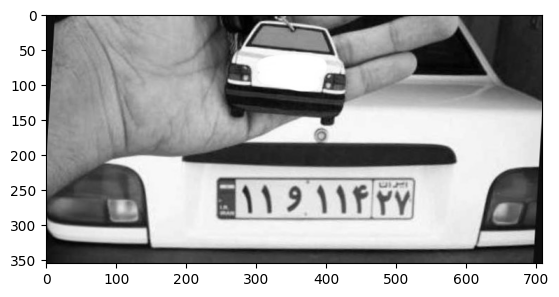

In [37]:
car_img = cv.imread("./img/Car_plate2.jpg")
car_img_gr = cv.cvtColor(car_img, cv.COLOR_BGR2GRAY)

plt.imshow(cv.cvtColor(car_img_gr, cv.COLOR_BGR2RGB))

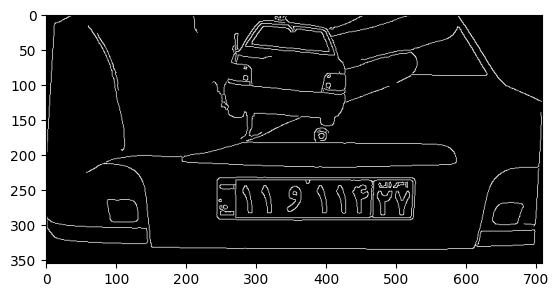

In [38]:
blateral_filter = cv.bilateralFilter(car_img_gr, 11, 15, 15)
edges = cv.Canny(blateral_filter, 30, 200)
plt.imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))

In [39]:
contours = cv.findContours(edges.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_refined = imutils.grab_contours(contours)
contours_sorted = sorted(contours_refined, key=cv.contourArea, reverse=True)[:4]

In [40]:
plate_location = None
for contour in contours_sorted:
    contour_approx = cv.approxPolyDP(contour, 10, True)
    if len(contour_approx) == 4:
        plate_location = contour_approx
        break

In [41]:
print(plate_location)

[[[244 236]]

 [[247 292]]

 [[525 289]]

 [[524 233]]]


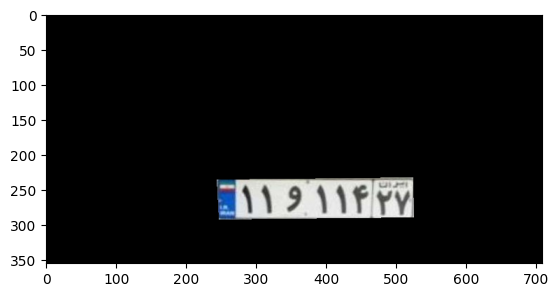

In [42]:
plate_mask0 = np.zeros(car_img_gr.shape, np.uint8)
plate_mask = cv.drawContours(plate_mask0, [plate_location], 0, 255, -1)
plate_img = cv.bitwise_and(car_img, car_img, mask=plate_mask)
plt.imshow(cv.cvtColor(plate_img , cv.COLOR_BGR2RGB))